# Proximal Policy Optimization (PPO) Reinforcement Learning on the `Taxi-V3 Gymnasium by OpenAI`  

## 1. Environment Setup
Before we start, we need to import all of the necessary libraries.

In [1]:
# Import Libraries
import gymnasium as gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
# Import Local Dependencies
from algorithms.PPO import PPOAgent
from utils import PPOTrainer, Tester

Next, we setup our `matplotlib`

In [3]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

## 2. Training Phase

### A. Initialize the hyperparameters and instances

In [4]:
N_ENVIRONMENT = 8 # @param {type:"slider", min:1, max:8, step:1}
BATCH_SIZE = 256 # @param {type:"slider", min:32, max:512, step:2}
GAMMA = 0.999 # @param {type:"slider", min:0.5, max:1, step:0.05}
LR= 0.003 # @param {type:"slider", min:0.00001, max:1, step:0.00001}

TOTAL_TIMESTEPS = 4_500_000 # @param {type:"slider", min:50000, max:10000000, step:10}

### B. Setup Instances

In [5]:
# Environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

agent = PPOAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,
                 n_environment=N_ENVIRONMENT, lr=LR, mini_batch=BATCH_SIZE)

trainer = PPOTrainer(agent=agent, total_timesteps=TOTAL_TIMESTEPS)

Using cpu device


/Users/jonathanbastinekho/miniconda3/envs/323/lib/python3.10/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


In [15]:
# Train the Agent
training_results = trainer.train()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 199      |
|    ep_rew_mean     | -782     |
| time/              |          |
|    fps             | 33832    |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 16384    |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 189        |
|    ep_rew_mean          | -621       |
| time/                   |            |
|    fps                  | 18375      |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 32768      |
| train/                  |            |
|    approx_kl            | 0.02461837 |
|    clip_fraction        | 0.445      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.77      |
|    explained_variance   | 6.88e-05   |
|    learning_rate        | 0.003      |
|   

In [17]:
training_results.episode_rewards

[-839.0,
 -740.0,
 -794.0,
 -803.0,
 -812.0,
 -695.0,
 -704.0,
 -740.0,
 -839.0,
 -776.0,
 -803.0,
 -911.0,
 -821.0,
 -758.0,
 -758.0,
 -686.0,
 -704.0,
 -767.0,
 -704.0,
 -713.0,
 -839.0,
 -731.0,
 -821.0,
 -812.0,
 -830.0,
 -758.0,
 -767.0,
 -749.0,
 -740.0,
 -776.0,
 -740.0,
 -839.0,
 -785.0,
 -848.0,
 -866.0,
 -713.0,
 -830.0,
 -830.0,
 -866.0,
 -857.0,
 -506.0,
 -758.0,
 -785.0,
 -776.0,
 -803.0,
 -812.0,
 -767.0,
 -740.0,
 -794.0,
 -722.0,
 -776.0,
 -740.0,
 -857.0,
 -884.0,
 -704.0,
 -803.0,
 -492.0,
 -830.0,
 -839.0,
 -785.0,
 -803.0,
 -713.0,
 -812.0,
 -785.0,
 -713.0,
 -821.0,
 -758.0,
 -767.0,
 -875.0,
 -911.0,
 -857.0,
 -794.0,
 -821.0,
 -866.0,
 -749.0,
 -794.0,
 -839.0,
 -767.0,
 -839.0,
 -722.0,
 -431.0,
 -731.0,
 -839.0,
 -677.0,
 -623.0,
 -659.0,
 -650.0,
 -686.0,
 -464.0,
 -659.0,
 -524.0,
 -587.0,
 -551.0,
 -713.0,
 -650.0,
 -668.0,
 -605.0,
 -578.0,
 -605.0,
 -632.0,
 -668.0,
 -623.0,
 -614.0,
 -614.0,
 -623.0,
 -36.0,
 -119.0,
 -302.0,
 -578.0,
 -560.0,
 -632.0,
 -

In [24]:
def plot_results(data, name, window = 100):
    ma_data = np.convolve(data, np.ones(window), 'valid') / window
    plt.figure(1)
    plt.title(f'Training Result ({name} progression over {len(data)} Episodes)')
    plt.xlabel('Episode')
    plt.ylabel(name)
    plt.plot(range(window - 1, len(data)), ma_data)
    plt.show()

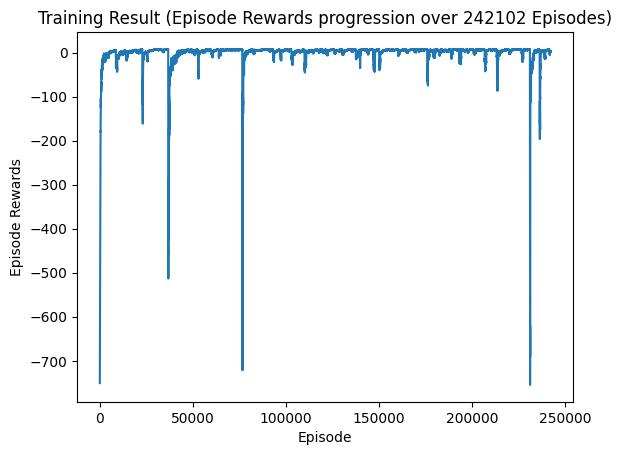

In [25]:
plot_results(data=training_results.episode_rewards, name="Episode Rewards")

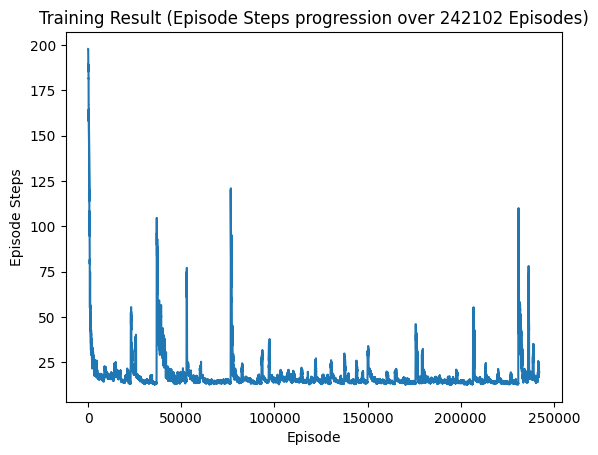

In [26]:
plot_results(data=training_results.episode_steps, name="Episode Steps")

## 3. Testing Phase

### Test on the agent at step 4 500 000

In [6]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Agent Load Model
agent_path = "taxi_model"
agent.load_model(agent_path)
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Actions taken: [move north, move north, move east, move east, move east, move south, move south, pickup passenger, move north, move north, move west, move west, move west, move south, move south, drop off passenger, ]
Episode: 1/400, Steps: 16, Reward: 5
Actions taken: [move north, move north, move east, move north, move north, move east, pickup passenger, move south, move south, move south, move south, move west, drop off passenger, ]
Episode: 2/400, Steps: 13, Reward: 8
Actions taken: [move north, move north, move west, move west, move west, move south, move south, pickup passenger, move north, move north, move east, move east, move east, move south, move south, drop off passenger, ]
Episode: 3/400, Steps: 16, Reward: 5
Actions taken: [move north, move west, move west, move west, move north, move north, pickup passenger, move east, move south, move south, move east, move east, move east, move north, move north, drop off passenger, ]
Episode: 4/400, Steps: 16, Reward: 5
Actions taken:

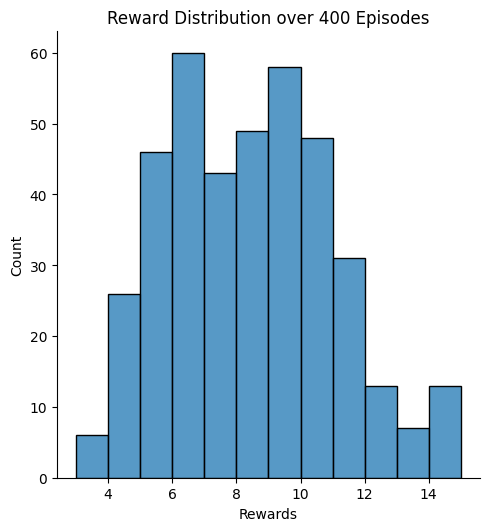

In [7]:
tester.plot_reward_dist()

In [8]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Agent Load Model
agent_path = "model_3500000"
agent.load_model(agent_path)
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Actions taken: [move east, move east, pickup passenger, move south, move south, move west, move south, move south, drop off passenger, ]
Episode: 1/400, Steps: 9, Reward: 12
Actions taken: [move north, move west, move south, move south, pickup passenger, move north, move north, move east, move east, move east, move east, move north, move north, drop off passenger, ]
Episode: 2/400, Steps: 14, Reward: 7
Actions taken: [move west, move north, pickup passenger, move south, move south, move south, move south, drop off passenger, ]
Episode: 3/400, Steps: 8, Reward: 13
Actions taken: [move north, move north, pickup passenger, move south, move south, move south, move south, drop off passenger, ]
Episode: 4/400, Steps: 8, Reward: 13
Actions taken: [move east, move south, move south, move south, move south, pickup passenger, move north, move north, move west, move west, move west, move south, move south, drop off passenger, ]
Episode: 5/400, Steps: 14, Reward: 7
Actions taken: [move north, move

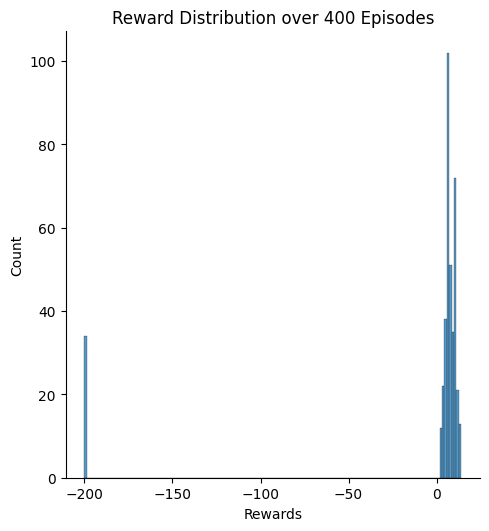

In [9]:
tester.plot_reward_dist()

In [10]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Agent Load Model
agent_path = "model_2000000"
agent.load_model(agent_path)
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Actions taken: [move east, move east, move east, move east, move north, move north, pickup passenger, move south, move south, move south, move south, move west, drop off passenger, ]
Episode: 1/400, Steps: 13, Reward: 8
Actions taken: [move west, move west, move west, move north, move north, move west, pickup passenger, move south, move south, move south, move south, drop off passenger, ]
Episode: 2/400, Steps: 12, Reward: 9
Actions taken: [move east, move north, move east, move east, move north, pickup passenger, move south, move west, move west, move south, move west, move north, move west, move north, drop off passenger, ]
Episode: 3/400, Steps: 15, Reward: 6
Actions taken: [move north, move north, pickup passenger, move south, move south, move east, move east, move east, move south, move south, drop off passenger, ]
Episode: 4/400, Steps: 11, Reward: 10
Actions taken: [move south, move south, move south, pickup passenger, move north, move north, move west, move west, move north, mo

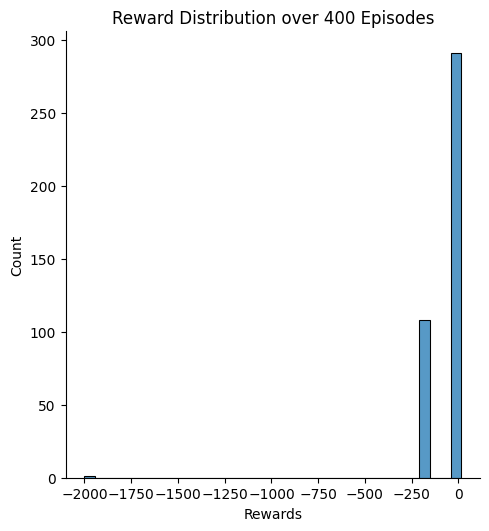

In [11]:
tester.plot_reward_dist()

In [12]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Agent Load Model
agent_path = "base_model"
agent.load_model(agent_path)
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Actions taken: [pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passenger, pickup passe

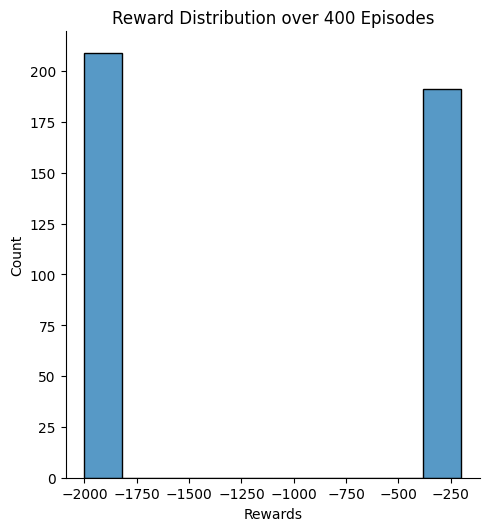

In [13]:
tester.plot_reward_dist()